# data_MBG_DE_MBG.DE Preperation 

*Fabian Niebelschütz*

# Inhaltsverzeichnis des Skripts:

[[_TOC_]]

---

### Vorliegende Datentyp:

**quantitative Daten auf Kardinalskala**

*Vorliegende Columns:*

- **Date:** Datum
- **Open:** Eröffnungskurs
- **High:** Höchstkurs
- **Low:** Tiefkurs
- **Close:** Schlusskurs
- **Volume:** Handelsvolumen



In [24]:
########################################################
#--------------- benötigten Librarys ------------------#
########################################################

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
########################################################
#------------- Historischer Aktienkurs ----------------#
#------------ Import via Yahoo Finance ----------------#
########################################################

ticker = "MBG.DE"
data_MBG_DE = yf.download(ticker, period="max")
data_MBG_DE.to_csv('/Users/fabi/Documents/BBA/6_Semester/Vertiefung_BBA/Zeitreihenanalyse_Menden/THWS_Reihenanalysen/data/data_Zeitreihe_Fabian_mercedes_benz_historical_data.csv')

[*********************100%***********************]  1 of 1 completed


In [22]:
########################################################
#------------- Historischer Aktienkurs ----------------#
#--------------- CSV Datei einlesen -------------------#
########################################################

data_MBG_DE = pd.read_csv('/Users/fabi/Documents/BBA/6_Semester/Vertiefung_BBA/Zeitreihenanalyse_Menden/THWS_Reihenanalysen/data/data_Zeitreihe_Fabian_mercedes_benz_historical_data.csv', 
                   skiprows=3, 
                   header=None, 
                   names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], 
                   parse_dates=[0], 
                   index_col=0)  

# Konvertiere alle numerischen Spalten zu Float
for col in data_MBG_DE.columns:
    data_MBG_DE[col] = pd.to_numeric(data_MBG_DE[col], errors='coerce')

In [ ]:
########################################################
#---------------- allgemeine Abfrage ------------------#
########################################################

# allgemien Infos
print(f"+{'-'*48}+")
print(f"|{'Allgemine Informationen der MBG.DE Daten':^48}|")
print(f"+{'-'*48}+ \n")
data_MBG_DE.info()

data_zusammenfassung = data_MBG_DE.describe()
print (f"\n\n")
print(f"+{'-'*48}+")
print(f"|{'Statistische Zusammenfassung der MBG.DE Daten':^48}|")
print(f"+{'-'*48}+ \n")
data_MBG_DE.describe()

---

## Formale Definition - Zeitreihe

**Erweiterte Statistische Analyse**

- Mittelwert
- Varianz
- Standardabweichung
- Kovarianzfunktion einer Zeitreihe ${\{y_t\}}$
- Autokorrelation 1. Ordnung
- Autokorrelation 2. Ordnung

In [ ]:
########################################################
#---------- Erweiterte Statistische Analyse -----------#
########################################################

# Für jede Spalte separate Statistiken berechnen
columns = ['Close', 'High', 'Low', 'Open', 'Volume']

for column in columns:
    values = data[column]
    
    # Berechne grundlegende Statistiken
    mean_value = np.mean(values)
    std_dev = np.std(values)
    variance = np.var(values)
    
    # Berechne Autokorrelationen
    autocorr_1 = values.autocorr(lag=1)
    autocorr_2 = values.autocorr(lag=2)
    
    # Ausgabe formatieren
    print(f"+{'-'*60}+")
    print(f"|{f'Statistiken für {column}':^60}|")
    print(f"+{'-'*60}+")
    print(f"Mittelwert (μ): {mean_value:.4f}")
    print(f"Standardabweichung (σ): {std_dev:.4f}")
    print(f"Varianz (σ²): {variance:.4f}")
    print(f"Autokorrelation 1. Ordnung: {autocorr_1:.4f}")
    print(f"Autokorrelation 2. Ordnung: {autocorr_2:.4f}")
    print("\n")

+------------------------------------------------+
|    Allgemine Informationen der MBG.DE Daten    |
+------------------------------------------------+ 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7306 entries, 1996-10-30 to 2025-05-07
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   7306 non-null   float64
 1   High    7306 non-null   float64
 2   Low     7306 non-null   float64
 3   Open    7306 non-null   float64
 4   Volume  7306 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 342.5 KB



+------------------------------------------------+
| Statistische Zusammenfassung der MBG.DE Daten  |
+------------------------------------------------+ 

+------------------------------------------------------------+
|                   Statistiken für Close                    |
+------------------------------------------------------------+
Mittelwert (μ): 25.6031
Standardabweichung (σ): 15.5112
Varianz

# Univariate Zeitreihenanalyse

## 1. Bestimmung der Integrationsordnung

### Augmented Dickey-Fuller Test (ADF-Test)
### Phillips-Perron Test (PP-Test)
### Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS-Test)

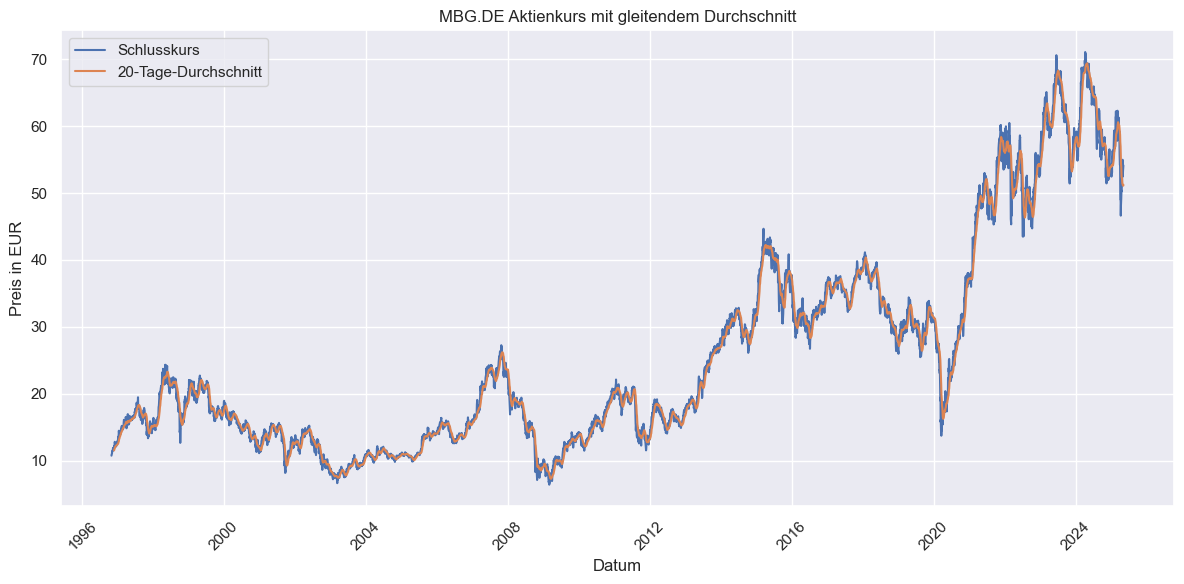

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn-Stil setzen
sns.set_theme(style="darkgrid")

# Plot erstellen
plt.figure(figsize=(12, 6))
sns.lineplot(x=data_MBG_DE.index, y=data_MBG_DE['Close'], label='Schlusskurs')
sns.lineplot(x=data_MBG_DE.index, y=data_MBG_DE['Close'].rolling(window=20).mean(), 
             label='20-Tage-Durchschnitt')

plt.title(f'{ticker} Aktienkurs mit gleitendem Durchschnitt')
plt.xlabel('Datum')
plt.ylabel('Preis in EUR')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Candlestick-Chart mit Volumen erstellen
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.02, row_heights=[0.7, 0.3])

# Candlestick
fig.add_trace(go.Candlestick(
    x=data_MBG_DE.index,
    open=data_MBG_DE['Open'],
    high=data_MBG_DE['High'],
    low=data_MBG_DE['Low'],
    close=data_MBG_DE['Close'],
    name='Kurs'
), row=1, col=1)

# Volumen hinzufügen
fig.add_trace(go.Bar(
    x=data_MBG_DE.index,
    y=data_MBG_DE['Volume'],
    name='Volumen',
    marker_color='rgb(55, 126, 184)'
), row=2, col=1)

# Layout anpassen
fig.update_layout(
    title=f'{ticker} Aktienkurs und Handelsvolumen',
    xaxis_title='Datum',
    yaxis_title='Preis in EUR',
    xaxis_rangeslider_visible=False,
    height=800,
    width=1200
)

fig.update_yaxes(title_text="Volumen", row=2, col=1)
fig.update_yaxes(title_text="Preis (EUR)", row=1, col=1)

fig.show()